
# Import Libraries 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Demographics

In [8]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
churn_no=df[df['Churn']=='No']
churn_yes=df[df['Churn']=='Yes']

In [18]:
churn_no.groupby(['gender','SeniorCitizen','Partner','Dependents'])['customerID'].count().reset_index()

,gender,SeniorCitizen,Partner,Dependents,customerID
0,Female,0,No,No,909
1,Female,0,No,Yes,110
2,Female,0,Yes,No,482
3,Female,0,Yes,Yes,720
4,Female,1,No,No,159
5,Female,1,No,Yes,2
6,Female,1,Yes,No,136
7,Female,1,Yes,Yes,31
8,Male,0,No,No,963
9,Male,0,No,Yes,168


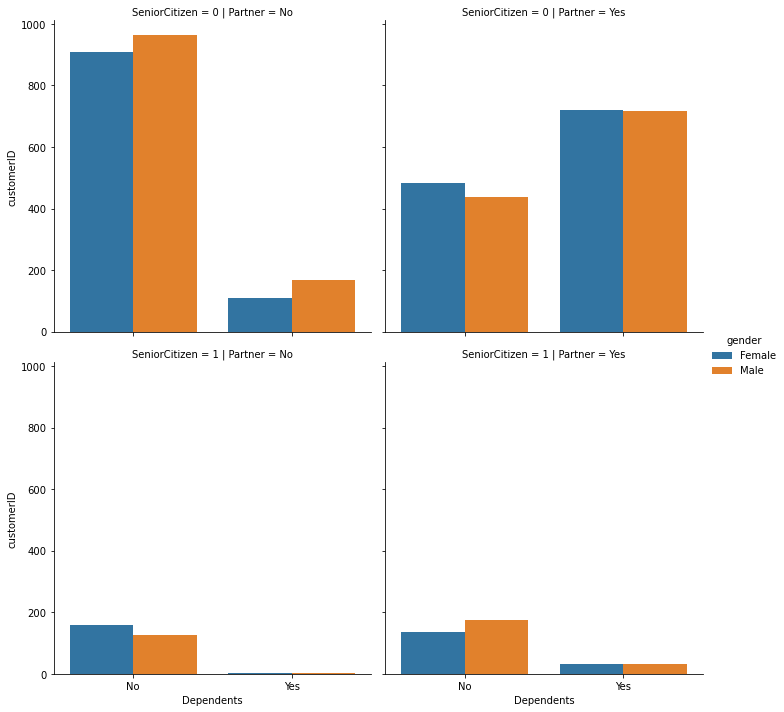

In [23]:
demo_no=churn_no.groupby(['gender','SeniorCitizen','Partner','Dependents'])['customerID'].count().reset_index()
sns.catplot(data=demo_no,x='Dependents',y='customerID',row='SeniorCitizen',col='Partner',hue='gender',kind='bar')

In [ ]:
Male and Female,Young Poeple, Young People with no partner, no depedents 

In [ ]:
Young People, People with no partner 

# Services

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

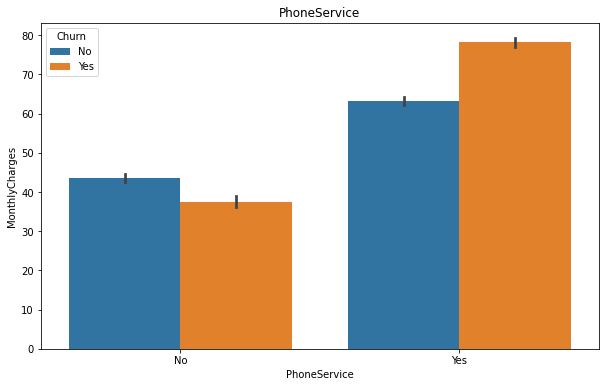

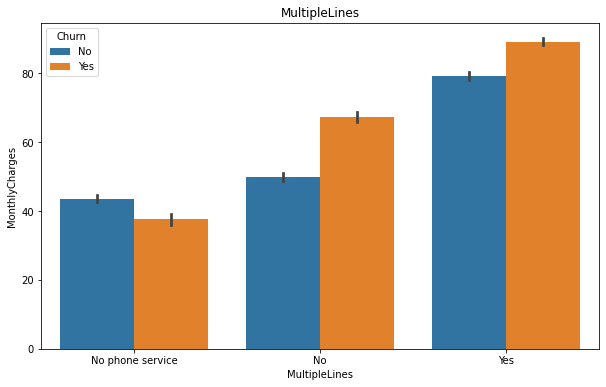

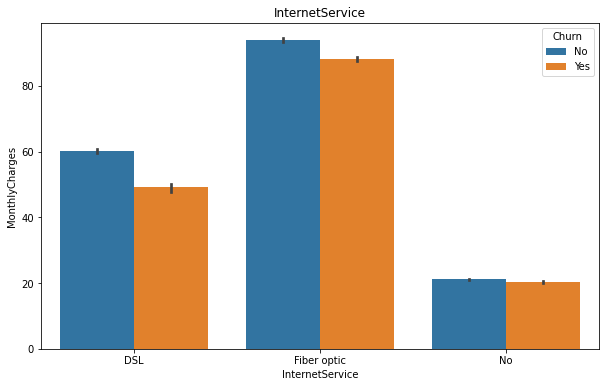

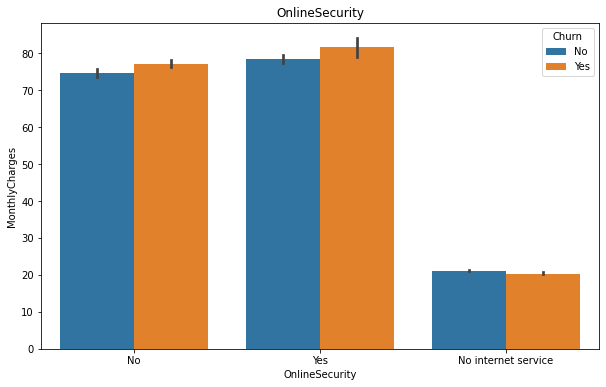

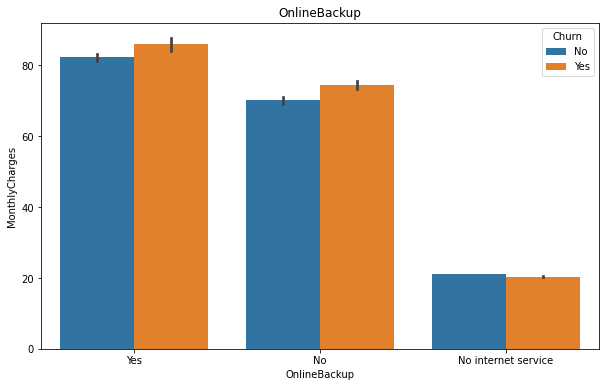

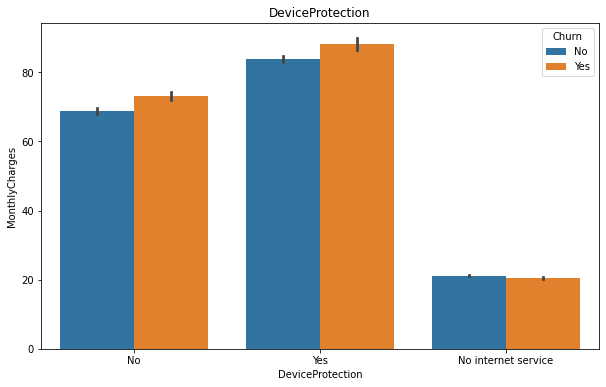

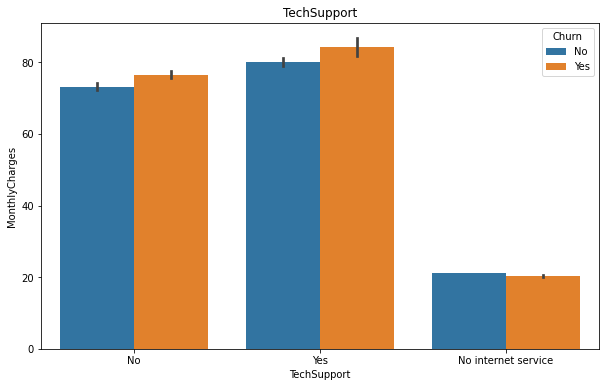

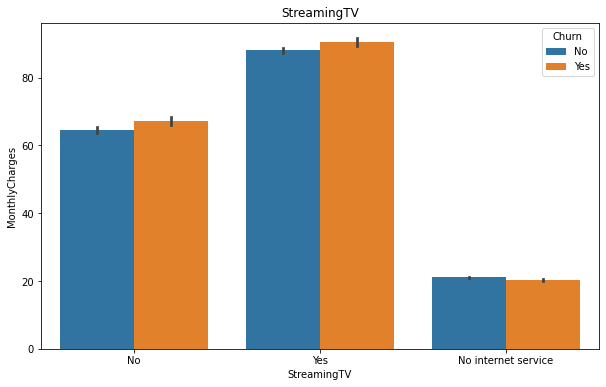

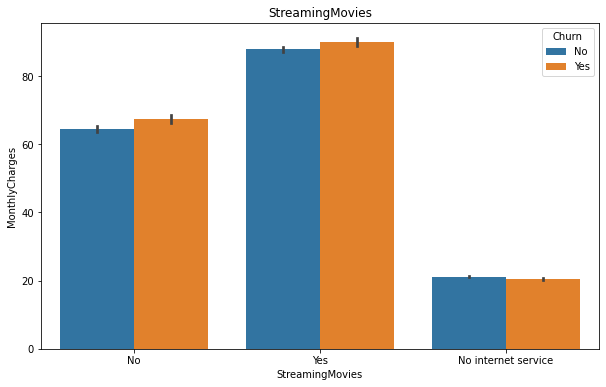

In [29]:
services=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

for services in services:
    plt.figure(figsize=(10,6))
    sns.barplot(x=services,y='MonthlyCharges',hue='Churn',data=df)
    plt.title(services)
    plt.show()

In [ ]:
All services seem to be contributing to a high monthly charge apart from the internet service hence teh customers churning apart from the internet service  

In [31]:
phone_service=df[df['PhoneService']=='Yes']

<AxesSubplot:xlabel='Contract', ylabel='count'>

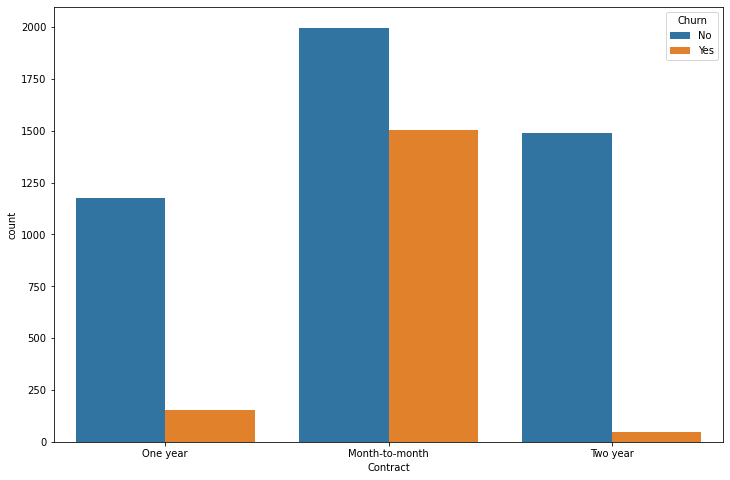

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data=phone_service,x='Contract',hue='Churn')

In [ ]:
Advocating for a two year contract for provision of phone service only would  

# Payment

<Figure size 864x576 with 0 Axes>

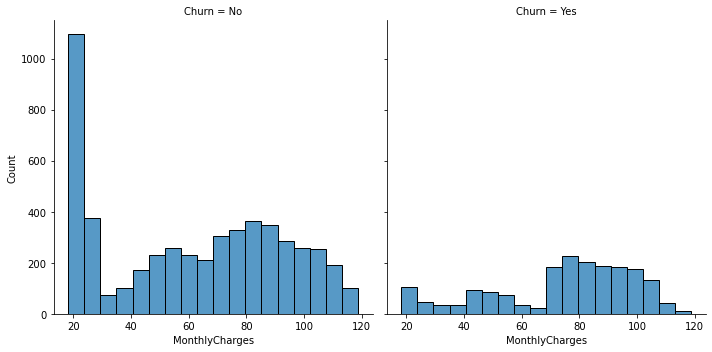

In [34]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='MonthlyCharges',col='Churn')

In [35]:
churn_no['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
1. Basic- 25
2. Plus - 64
3. Premium - 88

In [37]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
No, The company should not go strictly paperless

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

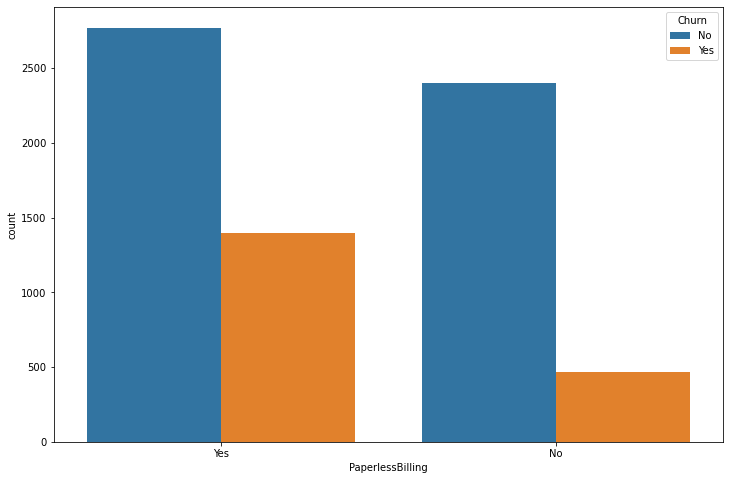

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')